In [185]:
import cv2
import matplotlib.pyplot as plt
from copy import copy
import pandas as pd
import os
from sklearn.manifold import TSNE
import numpy as np

## В данном случае хочется попробовать использовать алгоритм TSNE для визуализации 'цвета' кадров в двумерном пространстве (как это сделано в статье про Уэса Андерсона). Вообще статья очень удобная для нас в случае, если мы хотим увидеть одинаковые паттерны у разных режиссеров (одинаковое изображение сна, например, или скачек, или еще чего-нибудь). Может быть, у нас этого и не получится, но вдруг. 

In [186]:
def extract_every_k_second_frame(path_to_video, k: int, num_frames_per_sec=24):
    '''Функция отвечает за вычленение первого кадра каждой n-ной секунды (кадров т.о. становится меньше, 
    k - это номер секунды).
    Проблема: есть все-таки монтажные черные склейки, и n-ные секунды могут выпадать на них, из-за чего кадры
    могут получаться не очень качественными. Возможно, этого не будет заметно, или же количество черных кадров
    будет минимальным'''
    
    vidcap = cv2.VideoCapture(path_to_video)
    success,image = vidcap.read()
    count = 0
    while success:
        success,image = vidcap.read()
    #     print('Read a new frame: ', success, ' ', count) #это вероятно можно убрать
        count += 1
        if count % (num_frames_per_sec * k) == 0:
            cv2.imwrite("10_frames/{}_frame.jpg".format(count / num_frames_per_sec * k), image)

In [188]:
extract_every_k_second_frame('Anna_Karenina_Official_Trailer.mp4', 1)

In [39]:
def img_into_pixels(path_to_img):
    '''В этой функции мы каждый пиксель разделяем на три канала - RGB'''
    img = cv2.imread(path_to_img)

#convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
    r, g, b = cv2.split(img)
    r = r.flatten()
    g = g.flatten()
    b = b.flatten()
    
    return r, g, b

In [142]:
directory = '10_frames'
data = []
for file in os.listdir(directory):
    if file.endswith('.jpg'):
        pixels = img_into_pixels(os.path.join(directory, file))
        data.append(np.array(pixels).flatten()) #делаем список из слитых матриц rgb для каждой картинки -
                                                #в итоге у нас один длинный вектор на каждую картинку

In [123]:
len(data[0])

2764800

In [79]:
from sklearn.decomposition import PCA
'''Здесь я как бы схлопываю свою матрицу, у которой была размерность 150 х 2764800 до 150 х 50'''
pca = PCA(50)
pca_data = pca.fit_transform(np.array(data))

In [124]:
pca_data

array([[  2055.4144412 ,   5176.5958287 ,  -7550.89178651, ...,
           689.33146082,   3690.12763516,    849.10047664],
       [ 20999.73319068, -13943.39415129, -11171.40914839, ...,
          6693.10281786,  -3043.17411988,  -2011.14965794],
       [  1730.19104137,   8882.64919104,  -6400.3511697 , ...,
           191.48074295,   1450.18210505,  -1749.3652689 ],
       ...,
       [-13991.92001213,  16407.23440706,    151.88218483, ...,
           554.85920724,   5056.90860034,  -4930.41109239],
       [ 13043.0047692 , -26287.24318092,  -4110.85797177, ...,
          3898.61969822,  -6522.0004739 ,  -8921.67537091],
       [ -6082.11493683,   9437.55908075,  -7880.36360189, ...,
          5469.9972881 ,   2480.42387995,    883.70803412]])

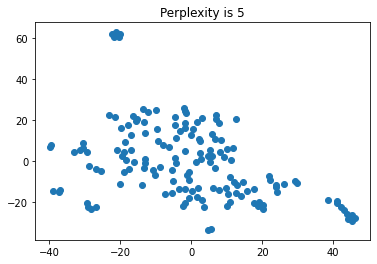

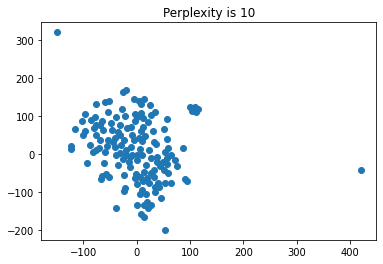

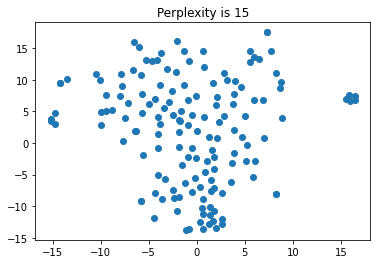

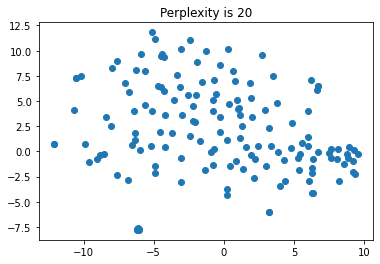

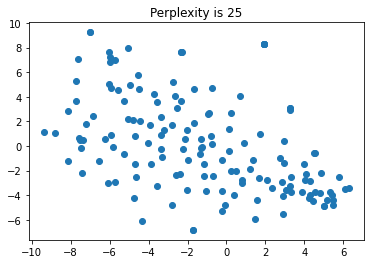

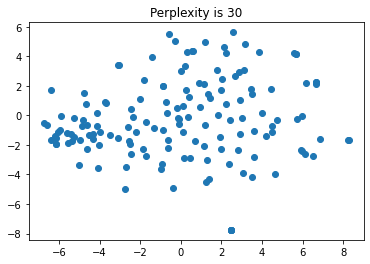

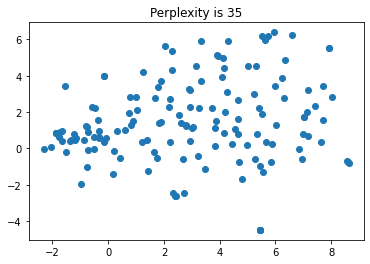

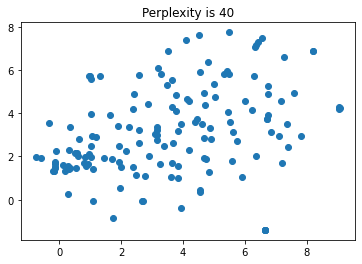

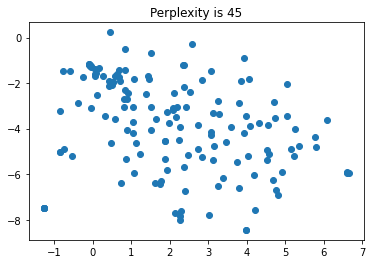

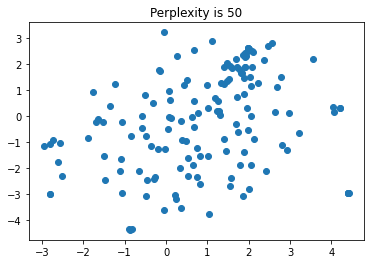

In [81]:
'''perplexity - атрибут TSNE. 
Вот что про него написано:
perplexityfloat, optional (default: 30)
The perplexity is related to the number of nearest neighbors that is used 
in other manifold learning algorithms. Larger datasets usually require a 
larger perplexity. Consider selecting a value between 5 and 50. 
Different values can result in significanlty different results.

Этот атрибут надо подбирать в зависимости от того, какие у нас данные'''

perplexity_r = range(5, 55, 5)
for perplexity in perplexity_r:
    tsne = TSNE(2, perplexity=perplexity)
    tsne_data = tsne.fit_transform(pca_data)#fit загружает в алгоритм данные и обучает нейросетку, 
                                            #а transform преобразует из многомерной матрицы в матрицу нужного размера
    plt.scatter(tsne_data[:,0], tsne_data[:, 1])
    plt.title("Perplexity is {}".format(perplexity))
    plt.show()

In [83]:
tsne_data

array([[ 7.4677056e-01, -2.3287337e+00],
       [-1.1154159e+00, -2.1209261e+00],
       [ 6.5627426e-01, -1.8576601e+00],
       [ 1.2274803e+00,  1.9592878e-01],
       [-2.9497995e+00, -1.1489280e+00],
       [ 1.0263194e+00, -1.5480349e+00],
       [-6.6717887e-01, -2.1091123e+00],
       [ 4.4101996e+00, -2.9566989e+00],
       [ 1.9928286e+00,  2.6230543e+00],
       [-5.6297068e-02,  3.2155044e+00],
       [ 1.0342810e-01,  6.1379069e-01],
       [ 2.3612998e+00,  2.1580937e+00],
       [ 5.3076667e-01, -2.3008132e+00],
       [ 1.3387095e+00,  1.2746810e+00],
       [ 1.5275460e+00,  1.4360847e+00],
       [ 4.0418248e+00,  3.6323559e-01],
       [-1.9233096e-01, -1.2598133e+00],
       [-4.6098480e-01, -2.4650435e+00],
       [ 4.6997523e-01, -9.3937218e-01],
       [-1.0989413e+00, -1.6329253e+00],
       [ 1.8686454e+00,  2.3245046e+00],
       [ 1.3016957e+00,  2.8233983e-02],
       [ 1.9286072e+00,  2.2943683e+00],
       [ 4.4422209e-01,  1.1747808e+00],
       [-3.07782

In [84]:
tsne = TSNE(2, perplexity=15)
tsne_data = tsne.fit_transform(pca_data)

In [183]:
'''Нашла код визуализации, на которой можно отобразить изображения при наведении мышки на точку.
С изображениями, однако, есть проблема - для того, чтоб они отразились, надо, чтоб они лежали в открытом доступе
в интернете. Поэтому пока что здесь отражаются номера картинок.'''

import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
#output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [184]:
draw_vectors(tsne_data[:,0], tsne_data[:, 1], token=list(range(len(tsne_data))))

Figure(id='4035', ...)

#### Вот тут есть код, из которого я пыталась взять пару функций, чтобы при рассмотрении моего графика вместо номеров токенов я видела картинки, потому что на одном форуме (https://discourse.bokeh.org/t/hovertool-displaying-image/1198) автор писал, что он хранит изображения в виде array (как и я здесь). Тем не менее, непонятно, что автор дает функции на вход, и пока что я не смогла с этим разобраться.
https://github.com/jni/blob-explorer/blob/bd9fa676a2a23317e2ea84bdf48b19e71b9e75d4/picker.py#L29

In [177]:
from io import BytesIO
import base64
from PIL import Image
from matplotlib import cm
from skimage import io, filters, measure, morphology, img_as_ubyte

def to_png(arr):
    out = BytesIO()
    im = Image.fromarray(arr)
    im.save(out, format='png')
    return out.getvalue()

def b64_image_files(images, colormap='magma'):
    cmap = cm.get_cmap(colormap)
    urls = []
    for im in images:
        png = to_png(img_as_ubyte(cmap(im)))
        url = 'data:10_frames/png;base64,' + base64.b64encode(png).decode('utf-8') #вот тут непонятно, что имеется в виду под data:
        urls.append(url)
    return urls

In [149]:
np.array(pixels).shape

(3, 921600)

In [178]:
urls = b64_image_files(list(map(lambda x: x.reshape(3, 921600), data)))

#### Вот тут - пример того, как сделать так, чтобы картинки отображались. Пока что моя проблема - отсутствие открытого интернет-ресурса, на который я могла бы упорядоченно закинуть свои изображения
https://docs.bokeh.org/en/latest/docs/user_guide/tools.html#custom-tooltip